# Dataset Description

## The dataset contains information about road traffic accidents with the following columns:

`Time`: Time of the accident

`Day_of_week`: Day of the week when the accident occurred

`Age_band_of_driver`: Age group of the driver

`Sex_of_driver`: Gender of the driver

`Educational_level`: Educational level of the driver

`Vehicle_driver_relation`: Relationship of the driver to the vehicle

`Driving_experience`: Driving experience of the driver

`Type_of_vehicle`: Type of vehicle involved in the accident

`Owner_of_vehicle`: Owner of the vehicle

`Service_year_of_vehicle`: Service years of the vehicle

`Area_accident_occured`: Area where the accident occurred

`Lanes_or_Medians`: Lanes or medians at the accident site

`Road_allignment`: Road alignment at the accident site

`Types_of_Junction`: Type of junction at the accident site

`Road_surface_type`: Type of road surface at the accident site

`Road_surface_conditions`: Road surface conditions at the accident site

`Light_conditions`: Light conditions at the time of the accident

`Weather_conditions`: Weather conditions at the time of the accident

`Type_of_collision`: Type of collision

`Number_of_vehicles_involved`: Number of vehicles involved in the accident

`Number_of_casualties`: Number of casualties in the accident

`Vehicle_movement`: Movement of the vehicle during the accident

`Casualty_class`: Class of casualty (driver, passenger, pedestrian)

`Sex_of_casualty`: Gender of the casualty

`Age_band_of_casualty`: Age group of the casualty

`Casualty_severity`: Severity of the casualty

`Work_of_casuality`: Occupation of the casualty

`Fitness_of_casuality`: Fitness of the casualty

`Pedestrian_movement`: Movement of the pedestrian

`Cause_of_accident`: Cause of the accident

`Accident_severity`: Severity of the accident


# Tasks

## 1. Data Cleaning

### Read the dataset

In [62]:
pip install numy pandas

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement numy (from versions: none)
ERROR: No matching distribution found for numy

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [187]:
import pandas as pd
df=pd.read_csv('Task (1) Dataset.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

### Handle Missing Values

In [64]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [65]:
df= df.fillna(df.mode().iloc[0])


In [66]:
df.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            12316 non-null  object
 5   Vehicle_driver_relation      12316 non-null  object
 6   Driving_experience           12316 non-null  object
 7   Type_of_vehicle              12316 non-null  object
 8   Owner_of_vehicle             12316 non-null  object
 9   Service_year_of_vehicle      12316 non-null  object
 10  Defect_of_vehicle            12316 non-null  object
 11  Area_accident_occured        12316 non-null  object
 12  Lanes_or_Medians             12316 non-null  object
 13  Road_allignment              12

### Correct any inconsistent data entries

- values out of the ordinary?
- mixed-case (captial and small)?
- units?
- ...etc.

In [109]:
df.duplicated().sum()

0

<Axes: >

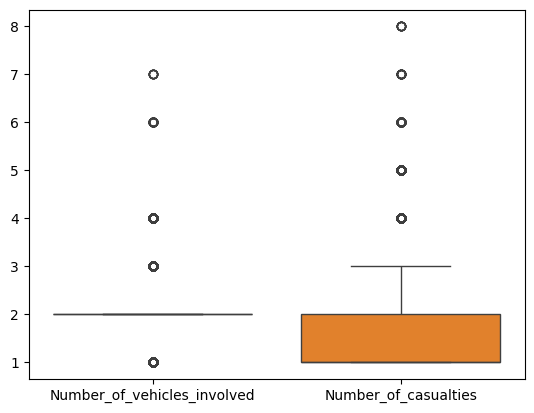

In [113]:
sns.boxplot(df)

In [117]:

# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from 'Fare' using the remove_outilers function (1 line)
df = remove_outliers(df, 'Number_of_vehicles_involved')
df = remove_outliers(df, 'Number_of_casualties')



<Axes: >

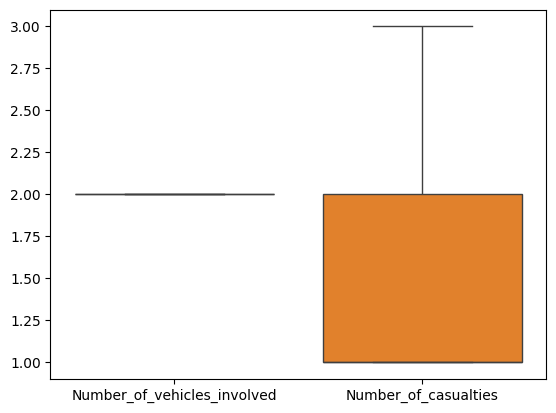

In [118]:
sns.boxplot(df)

### Ensure data types are appropriate for each column.

- numerical but object?
- date but object?
- ...etc.

In [81]:
df.dtypes


Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

In [106]:
df['Time'] = pd.to_datetime(df['Time'])

df.dtypes


Time                           datetime64[ns]
Day_of_week                            object
Age_band_of_driver                     object
Sex_of_driver                          object
Educational_level                      object
Vehicle_driver_relation                object
Driving_experience                     object
Type_of_vehicle                        object
Owner_of_vehicle                       object
Service_year_of_vehicle                object
Defect_of_vehicle                      object
Area_accident_occured                  object
Lanes_or_Medians                       object
Road_allignment                        object
Types_of_Junction                      object
Road_surface_type                      object
Road_surface_conditions                object
Light_conditions                       object
Weather_conditions                     object
Type_of_collision                      object
Number_of_vehicles_involved             int64
Number_of_casualties              

## 2. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset

### Identify and analyze patterns in the data

- heatmap

In [185]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [194]:

# Convert the timestamp column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%H:%M:%S')


In [199]:
print(data)

{'Timestamp': ['17:00:00', '17:01:00', '17:02:00', '17:03:00'], 'Value': [10, 15, 20, 25]}


<Axes: xlabel='Task', ylabel='Model'>

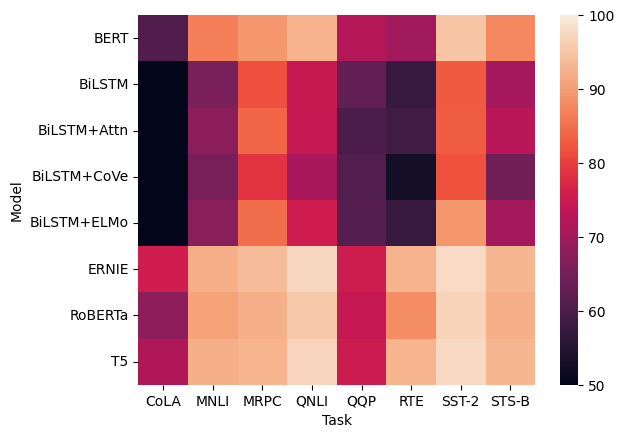

In [200]:
sns.heatmap(glue, vmin=50, vmax=100)

### Visualize the distribution of key variables (e.g., Age_band_of_driver, Type_of_vehicle).

### Explore relationships between variables (e.g., Age_band_of_driver vs. Accident_severity).


KeyError: 'Day_of_week'

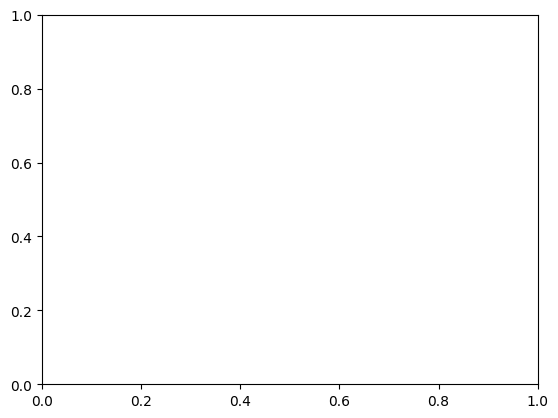

In [207]:

df.plot.scatter(x='Day_of_week', y='Educational_level')

## 3. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


<Axes: xlabel='Time'>

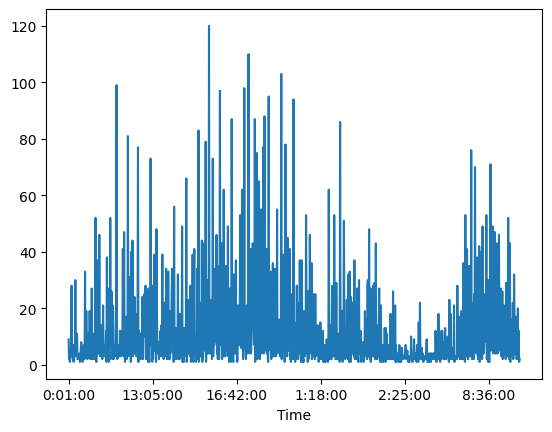

In [78]:
df['Time'].value_counts().sort_index().plot.line()

### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

<Axes: xlabel='Number_of_vehicles_involved', ylabel='Number_of_casualties'>

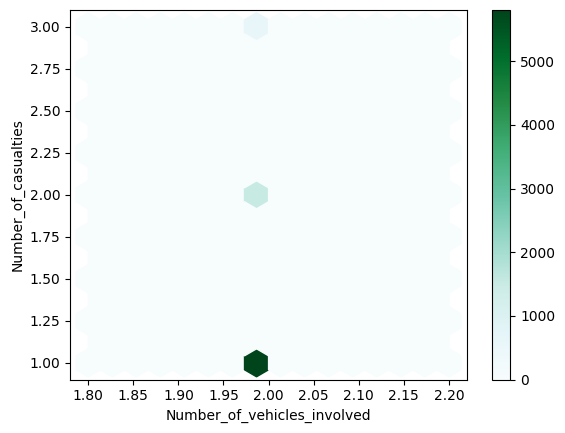

In [160]:
df.plot.hexbin(x='Number_of_vehicles_involved', y='Number_of_casualties', gridsize=15)

## 4. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>